In [1]:
%load_ext autoreload
%autoreload 2

# %% Jupyter Notebook Visualization Example
import json
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from artifacts_annotator.generators.crop_generator import AnnotationCropGenerator
from artifacts_annotator.controllers.output_writer import write_crops_and_metadata

In [3]:
# Example file paths
image_path = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.jpg")
json_path  = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.json")
output_folder = Path(r"d:\Roee\Code\AnnotationApp\examples\output_crops")
output_folder.mkdir(exist_ok=True, parents=True)

In [4]:
# assume image_path and json_path are defined externally
with open(json_path, 'r') as f:
    annotations = json.load(f)

img = Image.open(image_path).convert('RGB')
img_np = np.array(img)

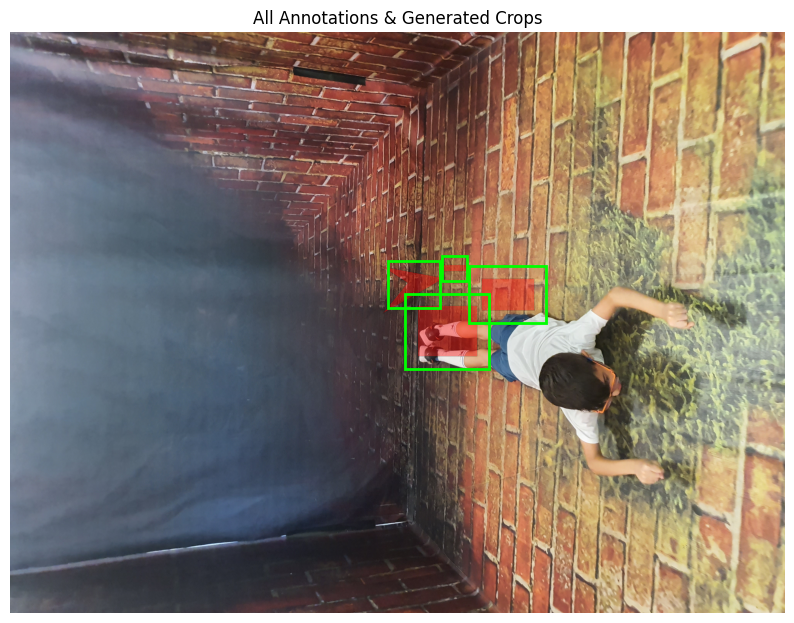

In [5]:
gen = AnnotationCropGenerator(
    annotations,
    image_size=img.size,
    window_size=(128,128),
    min_fraction=0.5
)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.array(img))
ax.set_xlim(0, img.width)
ax.set_ylim(img.height, 0)
ax.axis('off')

# iterate through all results
for mask, (off_x, off_y), crops in gen:
    # overlay mask
    overlay = np.zeros((mask.shape[0], mask.shape[1], 4))
    overlay[mask] = (1, 0, 0, 0.4)
    ax.imshow(overlay, extent=(off_x, off_x+mask.shape[1], off_y+mask.shape[0], off_y), origin='upper')
    # draw crops
    for l, t, r, b in crops:
        rect = patches.Rectangle((l, t), r-l, b-t, edgecolor='lime', fill=False, linewidth=2)
        ax.add_patch(rect)

ax.set_title('All Annotations & Generated Crops')
plt.show()

In [7]:
write_crops_and_metadata(image_path,gen,output_folder)